## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [253]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [254]:
original_data.dropna(inplace = True)
original_data

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.000000,Dog,Normal,Stray,Neutered Male,10.000000,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.000000,Dog,Normal,Public Assist,Neutered Male,7.000000,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.000000,Dog,Normal,Public Assist,Neutered Male,6.000000,2014,3.0,1.113889
3,Transfer,Neutered Male,10.000000,Dog,Normal,Owner Surrender,Neutered Male,10.000000,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.000000,Dog,Injured,Public Assist,Neutered Male,16.000000,2013,1.0,0.119444
...,...,...,...,...,...,...,...,...,...,...,...
79667,Transfer,Unknown,0.038356,Cat,Normal,Stray,Unknown,0.038356,2018,1.0,0.077083
79668,Euthanasia,Unknown,2.000000,Other,Normal,Wildlife,Unknown,2.000000,2018,1.0,0.053472
79669,Euthanasia,Unknown,1.000000,Other,Normal,Wildlife,Unknown,1.000000,2018,1.0,0.047917
79670,Return to Owner,Intact Male,0.821918,Dog,Normal,Stray,Intact Male,0.410959,2018,1.0,1.762500


In [255]:
columns_X = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)']

In [256]:
random = original_data.copy()
random  = random.sample(frac = 1)

percentage = int(len(random)*0.8)
training_set = pd.DataFrame(random[:percentage])
test_set = pd.DataFrame(random[percentage:])
training_set

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
23836,Adoption,Neutered Male,2.000000,Dog,Normal,Stray,Neutered Male,2.000000,2015,1.0,4.774306
32621,Adoption,Neutered Male,0.164384,Cat,Normal,Stray,Intact Male,0.164384,2015,1.0,4.300000
43892,Adoption,Spayed Female,4.000000,Dog,Normal,Owner Surrender,Intact Female,4.000000,2015,1.0,5.008333
76147,Adoption,Spayed Female,0.493151,Dog,Normal,Stray,Intact Female,0.410959,2017,1.0,6.119444
71150,Rto-Adopt,Spayed Female,2.000000,Dog,Normal,Stray,Spayed Female,2.000000,2018,1.0,5.987500
...,...,...,...,...,...,...,...,...,...,...,...
53308,Adoption,Neutered Male,3.000000,Dog,Normal,Stray,Intact Male,3.000000,2016,1.0,4.113194
23448,Euthanasia,Neutered Male,14.000000,Dog,Normal,Stray,Neutered Male,14.000000,2014,1.0,0.109722
78598,Disposal,Unknown,1.000000,Cat,Normal,Stray,Unknown,1.000000,2018,1.0,34.243056
56269,Adoption,Spayed Female,0.164384,Cat,Normal,Stray,Intact Female,0.057534,2016,1.0,53.247222


In [257]:
X_train = pd.get_dummies(training_set[columns_X])
X_train.head()
X_test = pd.get_dummies(test_set[columns_X])

In [258]:
y_train_all = training_set['outcome_type']
y_train = pd.get_dummies(y_train_all)
y_train = y_train['Adoption']
y_test_all = test_set['outcome_type']
y_test = pd.get_dummies(y_test_all)
y_test =y_test['Adoption']

In [259]:
y_test

13808    False
74797     True
23142    False
76930     True
16126    False
         ...  
23474     True
4506      True
57959    False
2996      True
76125    False
Name: Adoption, Length: 15933, dtype: bool

In [260]:
normalized_Xtrain=(X_train-X_train.mean())/X_train.std(ddof = 0)
normalized_Xtrain
normalized_Xtest = (X_test - X_train.mean())/X_train.std(ddof = 0)
normalized_Xtest

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
13808,-1.101914,1.920401,-0.381584,-0.258545,-0.392659,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,-0.651686,1.464861,-0.435455,-0.402423,-0.305284,-0.364502,-0.372795,1.347160,-0.686292,-0.305284
74797,1.201126,-0.277496,1.701368,-0.254717,1.685730,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,-0.651686,-0.682658,-0.435455,2.484947,-0.305284,-0.364502,-0.372795,-0.742302,1.457105,-0.305284
23142,-1.101914,-0.277496,-0.722085,-0.404056,-0.732413,-0.065712,1.301342,-1.147552,-0.243678,-0.063757,...,-0.651686,-0.682658,-0.435455,-0.402423,3.275637,-0.364502,-0.372795,-0.742302,-0.686292,3.275637
76930,1.201126,1.920401,-0.034426,0.757534,-0.046260,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,1.534482,-0.682658,-0.435455,-0.402423,-0.305284,-0.364502,-0.372795,-0.742302,1.457105,-0.305284
16126,-1.101914,-0.277496,-0.702112,-0.359028,-0.712484,-0.065712,-0.768437,-1.147552,4.103777,-0.063757,...,-0.651686,-0.682658,-0.435455,-0.402423,3.275637,-0.364502,-0.372795,-0.742302,-0.686292,3.275637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23474,-1.101914,-0.277496,-0.700210,0.153494,-0.682114,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,-0.651686,1.464861,-0.435455,-0.402423,-0.305284,-0.364502,2.682438,-0.742302,-0.686292,-0.305284
4506,-1.101914,1.920401,-0.034426,1.944997,0.300138,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,-0.651686,-0.682658,-0.435455,2.484947,-0.305284,-0.364502,-0.372795,-0.742302,1.457105,-0.305284
57959,0.433446,-0.277496,-0.529008,-0.230070,-0.511288,-0.065712,1.301342,-1.147552,-0.243678,-0.063757,...,-0.651686,-0.682658,2.296449,-0.402423,-0.305284,-0.364502,-0.372795,1.347160,-0.686292,-0.305284
2996,-1.869594,-0.277496,0.312733,0.009695,0.300138,-0.065712,-0.768437,0.871420,-0.243678,-0.063757,...,-0.651686,-0.682658,-0.435455,2.484947,-0.305284,-0.364502,-0.372795,-0.742302,1.457105,-0.305284


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [286]:
def compute_TFNP(prediction , target):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(prediction)):
        if (prediction[i] == 0) & (target[i] == 0):
            TN = TN + 1
        if (prediction[i] == 0) & (target[i] == 1):
            FN = FN + 1
        if (prediction[i] == 1) & (target[i] == 1):
            TP = TP + 1
        if (prediction[i] == 1) & (target[i] == 0):
            FP = FP + 1

    return[TP,FP,FN,TN]
    
def compute_score(TFNP):
    TP = TFNP[0]
    FP = TFNP[1]
    TN = TFNP[3]
    FN = TFNP[2]
    acc = (TP + TN)/(TP + TN + FP + FN)
    if (TP + FP) != 0:
        precision_P = TP/(TP + FP)
    else : 
        precision_P =np.inf
    if (TP + FN) != 0:
        recall_P = TP/(TP+FN)
    else : 
        recall_P = np.inf
    F1_P = 2*(precision_P*recall_P)/(precision_P+ recall_P)
    
    if (TN + FN) != 0:
        precision_N = TN/(TN + FN)
    else : 
        precision_N = np.inf

    if (TN + FP) != 0:
        recall_N = TN/(TN+FP)
    else : 
        recall_N =  np.inf 
        
    F1_N = 2*(precision_N*recall_N)/(precision_N+ recall_N)

    return acc, precision_P,recall_P, F1_P,precision_N,recall_N, F1_N

def confusion_matrix(TFNP):
    # Plotting the confusion matrix
    conf_matrix_lect = np.array([[TFNP[0],TFNP[1]],[TFNP[2],TFNP[3]]])
    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix_lect, cmap=plt.cm.Blues)
    # Add labels and display the plot
    plt.title('Confusion Matrix')
    plt.xlabel('True')
    plt.ylabel('Predict')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])
    plt.colorbar(cax)

    # Display the values on the matrix
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(conf_matrix_lect[i, j]), ha='center', va='center', color='red')

    plt.show()


In [287]:
logistic = LogisticRegression(solver='lbfgs', max_iter = 10000)

logistic.fit(normalized_Xtrain, y_train)

pred_proba = logistic.predict_proba(normalized_Xtest)

pred_proba_binary = [0 if i[1] < 0.5  else 1 for i in pred_proba]

y_test = y_test.reset_index(drop = True)

TFNP = compute_TFNP(pred_proba_binary, y_test)
#compute_score
TFNP
acc, precision, recall, F1,precisionN, recallN, F1N = compute_score(TFNP)

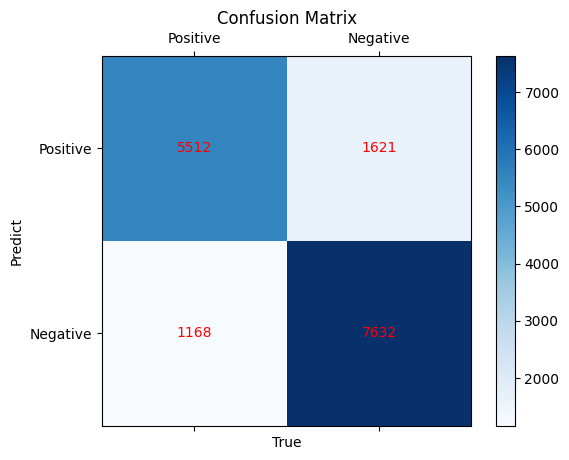

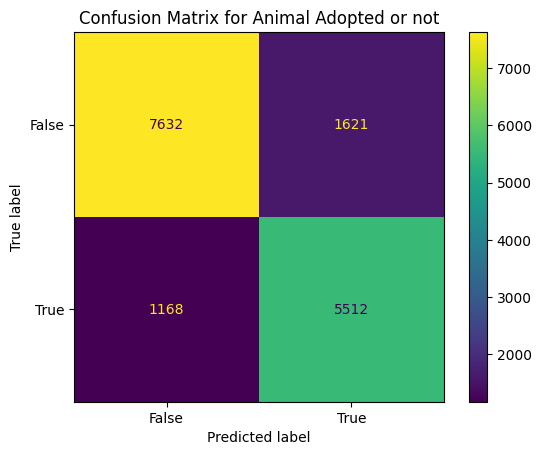

In [288]:
from sklearn.metrics import ConfusionMatrixDisplay
#return[TP,FP,FN,TN]
confusion_matrix(TFNP)
conf_matrix = np.array([[TFNP[3],TFNP[1]],[TFNP[2],TFNP[0]]])
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels = [False,True])
disp.plot()
plt.title('Confusion Matrix for Animal Adopted or not')
plt.show()

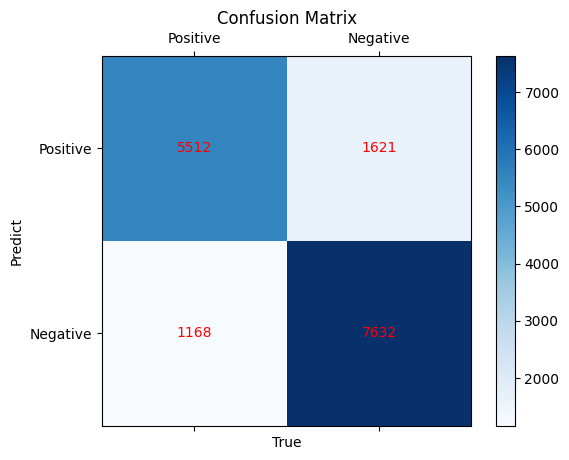

In [289]:
confusion_matrix(TFNP)

In [290]:

print('Accuracy =', acc)
print('\n')

print('-------Positive------------')

print('Precision =', precision)
print('\n')

print('Recall =', recall)
print('\n')

print('F1 score =', F1)
print('\n')

print('-------Negative------------')
print('Precision =', precisionN)
print('\n')

print('Recall =', recallN)
print('\n')

print('F1 score =', F1N)
print('\n')



Accuracy = 0.8249544969560033


-------Positive------------
Precision = 0.7727463900182252


Recall = 0.8251497005988024


F1 score = 0.7980887569680737


-------Negative------------
Precision = 0.8672727272727273


Recall = 0.8248135739760077


F1 score = 0.8455104414778708




### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [306]:
threshold = np.linspace(0,1,50)

acc = []
precisionP = []
recallP = []
F1P = []
precisionN =[]
recallN = []
F1N = []

for thr in threshold: 
    pred_proba_threshold = [0 if i[1] < thr  else 1 for i in pred_proba]
    TFNP = compute_TFNP(pred_proba_threshold, y_test)
    acc_, precision, recall, F1, precisionN_,  recallN_,  F1N_ = compute_score(TFNP)
    acc.append(acc_)
    precisionP.append(precision)
    recallP.append(recall)
    F1P.append(F1)
    precisionN.append(precisionN_)
    recallN.append(recallN_)
    F1N.append(F1N_)


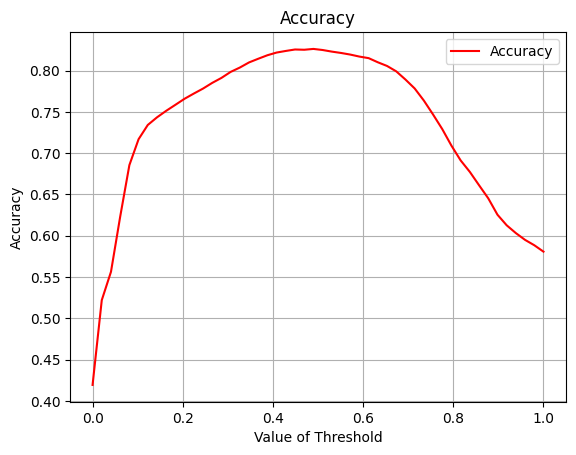

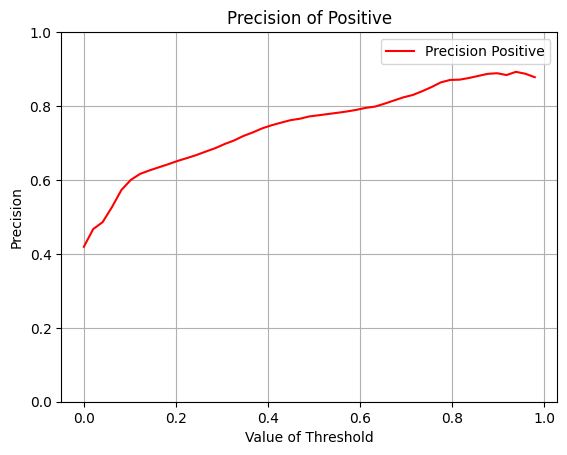

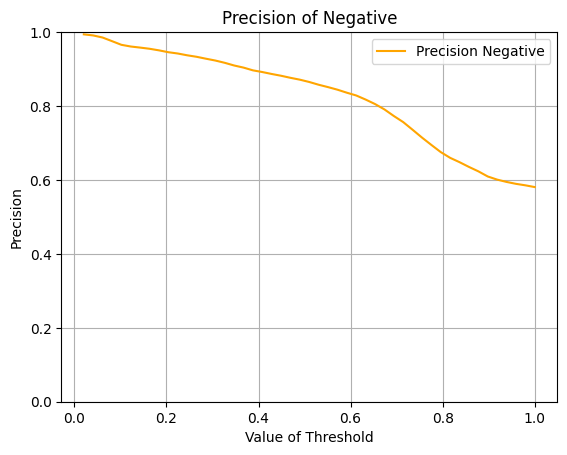

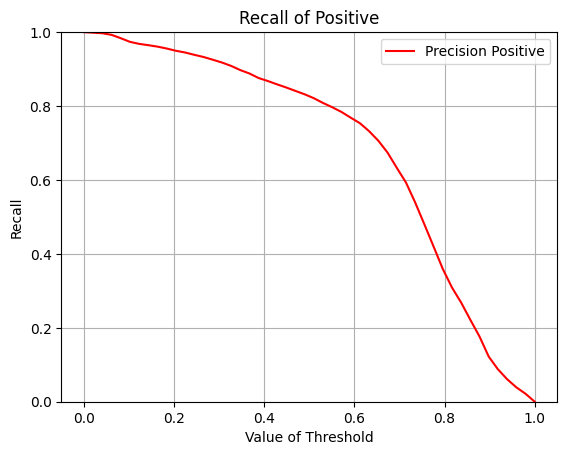

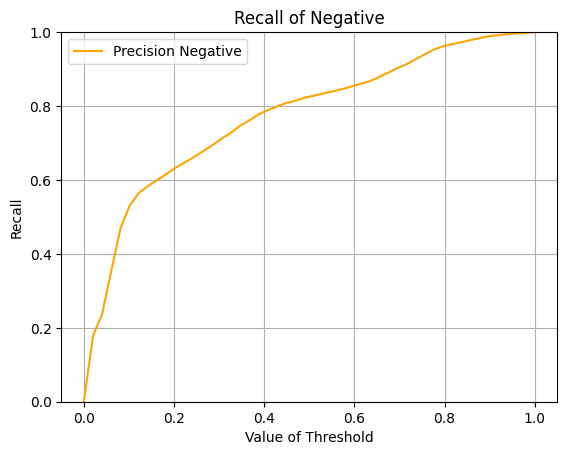

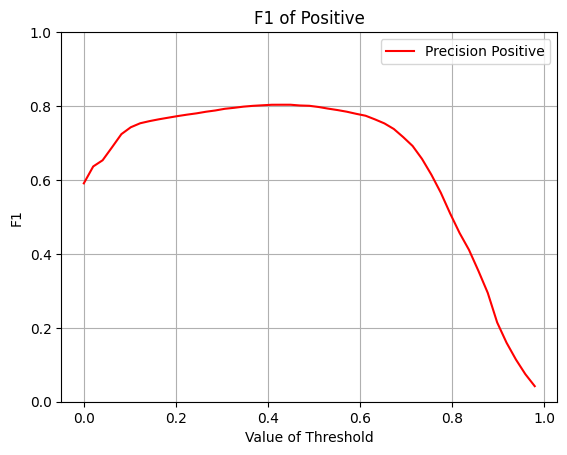

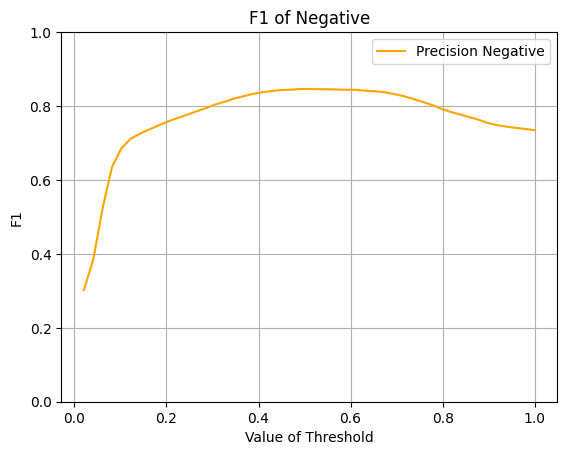

In [307]:
#Plot accuracy
plt.title('Accuracy')
plt.xlabel('Value of Threshold')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(threshold,acc, color = 'red', label = 'Accuracy')
plt.legend()
plt.show()

#Plot the Precision
plt.title('Precision of Positive')
plt.xlabel('Value of Threshold')
plt.ylabel('Precision')
plt.grid()
plt.plot(threshold,precisionP, color = 'red', label = 'Precision Positive')
plt.ylim([0,1])
plt.legend()
plt.show()

plt.title('Precision of Negative')
plt.xlabel('Value of Threshold')
plt.ylabel('Precision')
plt.grid()
plt.plot(threshold,precisionN, color = 'orange', label = 'Precision Negative')
plt.ylim([0,1])
plt.legend()
plt.show()

#Plot the Recall
plt.title('Recall of Positive')
plt.xlabel('Value of Threshold')
plt.ylabel('Recall')
plt.grid()
plt.plot(threshold,recallP, color = 'red', label = 'Precision Positive')
plt.ylim([0,1])
plt.legend()
plt.show()

plt.title('Recall of Negative')
plt.xlabel('Value of Threshold')
plt.ylabel('Recall')
plt.grid()
plt.plot(threshold,recallN, color = 'orange', label = 'Precision Negative')
plt.ylim([0,1])
plt.legend()
plt.show()

#Plot the F1
plt.title('F1 of Positive')
plt.xlabel('Value of Threshold')
plt.ylabel('F1')
plt.grid()
plt.plot(threshold,F1P, color = 'red', label = 'Precision Positive')
plt.ylim([0,1])
plt.legend()
plt.show()

plt.title('F1 of Negative')
plt.xlabel('Value of Threshold')
plt.ylabel('F1')
plt.grid()
plt.plot(threshold,F1N, color = 'orange', label = 'Precision Negative')
plt.ylim([0,1])
plt.legend()
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [333]:
df

,feature,coeff
0,intake_year,0.200497
1,intake_number,0.051206
2,age_upon_intake_(years),-1.900741
3,time_in_shelter_days,0.755352
4,age_upon_outcome_(years),1.512323
5,animal_type_Bird,0.228879
6,animal_type_Cat,-0.033875
7,animal_type_Dog,-0.061548
8,animal_type_Other,0.138579
9,intake_condition_Aged,0.045843


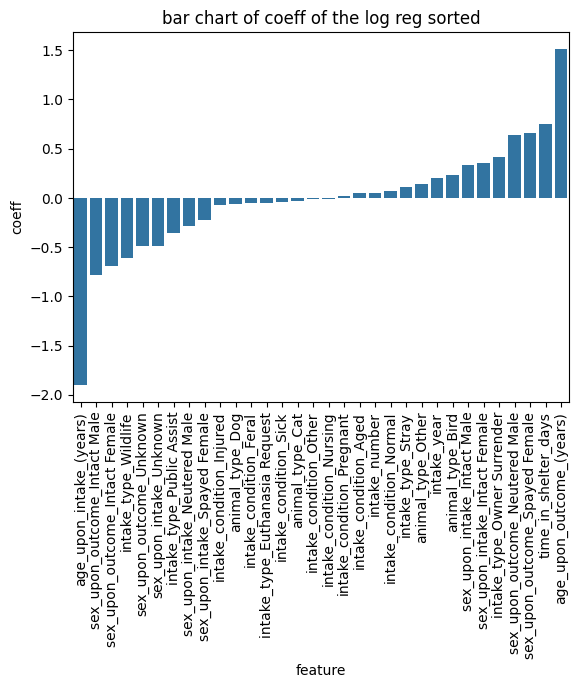

In [337]:
coeff = logistic.coef_
d = {'feature': X_train.columns, 'coeff': coeff[0] }
df = pd.DataFrame(data = d)
df

df = df.sort_values(by=['coeff'])

sns.barplot(x = 'feature',y = 'coeff',data = df)
plt.title('bar chart of coeff of the log reg sorted')
plt.xticks(rotation = 'vertical')
plt.show()



## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- **a) F1 Score**
- b) Recall
- c) Precision
- d) Accuracy

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- **d) True positive rate is 0.95**

In [341]:

#compute_score
#TP,FP,FN,TN]
TFNP_2 = [100,10 ,5 ,50]
acc, precision, recall, F1,precisionN, recallN, F1N = compute_score(TFNP_2)







print('Accuracy =', acc)
print('\n')


print('-------Positive------------')

print('Precision =', precision)
print('\n')

print('Recall =', recall)
print('\n')

print('F1 score =', F1)
print('\n')

print('-------Negative------------')
print('Precision =', precisionN)
print('\n')

print('Recall =', recallN)
print('\n')

print('F1 score =', F1N)
print('\n')


Accuracy = 0.9090909090909091


-------Positive------------
Precision = 0.9090909090909091


Recall = 0.9523809523809523


F1 score = 0.9302325581395349


-------Negative------------
Precision = 0.9090909090909091


Recall = 0.8333333333333334


F1 score = 0.8695652173913043


